In [1]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt


def creatDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels


def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet #复制inX为（dataSetSize, 1）
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort() #按照value排序，并且返回索引
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    
    sortedClassCount = sorted(classCount.items(), key = lambda item: item[1] ,reverse = True)
    
    return sortedClassCount[0][0]


In [2]:
def file2matrix(fileName):
    fr = open(fileName)
    arrayAllLines = fr.readlines()
    numberOfLines = len(arrayAllLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    
    for line in arrayAllLines:
        line.strip() #默认删除此行开头和结尾的空格和换行
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
        
    return returnMat, classLabelVector

pathName = "./datingTestSet2.txt"
datingDataMat, datingLabels = file2matrix(pathName)

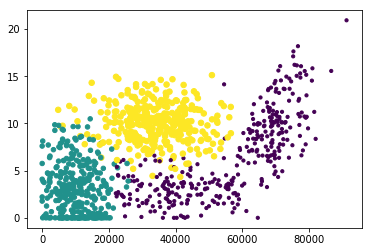

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2]) #不同label显示同样的颜色
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 10.0 * np.array(datingLabels), 10.0 * np.array(datingLabels))#不同的label显示不同的颜色
plt.show()

In [4]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    row = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (row, 1))
    normDataSet = normDataSet / np.tile(ranges, (row, 1))
    return normDataSet, ranges, minVals


In [5]:
def datingClassTest():
    hoRatio = 0.10
    pathName = "./datingTestSet2.txt"
    datingDataMat, datingLabels = file2matrix(pathName)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    row = normMat.shape[0]
    numTestVecs = int(hoRatio * row)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:row,:], datingLabels[numTestVecs:row], 5)
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
        
    print("The total error tate is : %f" % (errorCount / float(numTestVecs)))

In [6]:
datingClassTest()

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe